# NSD Final Project

## Title: 

### Team member: 李心怡，尉银杰

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\EE}{\mathbb{E} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\xx}{\mathcal{X} }
\newcommand{\nn}{\mathcal{NN} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

### Abstract

### Table of content (optional)

### Introduction

- Hedging has always been a main concern for the sellside. Classic approach of hedging requires a specific model for the dynamics of the hedging instruments, e.g. Black-Scholes model and its variants, which the real data may not follow. Thus, accuracy of such hedging strategy is impaired once the underlying model is proven wrong.

- With the rise of modern machine learning techniques, more and more researchers tried to implement a model-free method which allows for theoretically perfect hedging. In addition, it is easier to add market frictions to such strategy. In our project, we will introduce a reinforcement learning method from the paper "Deep Hedging" (Buehler et al, 2019), and try to reproduce its experiment result.

### Setting 1 - Discrete-time Market with Friction

#### Discrete-time
Below are some basic notations for a discrete-time market.

- $T$: finite time horizon, maximum maturity of all instruments.

- $0=t_0<t_1<\cdots <t_n=T$: trading dates.

- $I_k \in \RR^r$: any NEW market information at time $t_k$.

- $\ff_k$: any market information at time $t_k$.

- $S = (S_k)_{k=0,1,\dots ,n}$, $S_k \in \RR_d$: prices of $d$ hedging instruments adapted to filtration $\ff$, including primary assets like equities and secondary assets like options.

- $Z$: agent's liabilities, which is a contingent claim and is adapted to filtration $\ff$.

- $\delta = (\delta_k)_{k=0,1,\dots ,n}$, $\delta_k \in \RR_d$: hedging strategy, where $\delta_k^i$ denotes agent's holdings of the $i$th asset at time $t_k$, and we stipulate that $\delta_{-1}=\delta_n=0$.

- $p_0$: addtional cash injected to the agent's portfolio at time $0$.



#### Frictions

We define the following variables to allow frictions in the market:

- $\hh^u$: unconstrained set of hedging strategy $\delta$.

- $\hh_k^c$: constrained set of the holdings at time $t_k$ due to liquidity, asset availability and trading restrictions.

- $H_k: \RR^{d(k+1)}\rightarrow\RR^{d}$: function that computes constrained holdings $\delta_k^c\in \hh_k^c$ from unconstrained holdings $\delta_k^u\in \hh^u$ and constrained holdings $\{\delta_i^c\in \hh_i^c\}$ for $i \in \{0,1,...,k-1\}$.

- $H$: constrained "projection" from $\hh^u$ to $\hh_k^c$. It can be defined successively as $(H\circ\delta_k^u)_k = H_k\{(H\circ\delta_0^u)_0,(H\circ\delta_1^u)_1,...,(H\circ\delta_{k-1}^u)_{k-1}, \delta_k^u\}$

- $c_k(\delta_k-\delta_{k-1})$: cost of trading incurred at time $t_k$ for changing the holdings from $\delta_k$ to $\delta_{k-1}$. Typically it takes one of the following forms:
<ul>
    
- Proportional transaction cost: $c_k(n) = \sum_{i=1}^d c_k^iS_k^i|n^i|$

- Fixed transaction cost: $c_k(n) = \sum_{i=1}^d c_k^i1_{|n^i|\ge \epsilon}$

- Complex cross asset cost: such as the cost of volatility
</ul>

- $C_T(\delta) = \sum_{k=1}^T c_k(\delta_k-\delta_{k-1})$: total transaction costs of trading a strategy $\delta$ up to maturity $T$.




#### Portfolio Value

Given the notations above, we have the terminal value of the agent's portfolio:
$$PL_T(Z,p_0,\delta) = -Z+p_0+(\delta\cdot S)_T-C_T(\delta)$$

### Setting 2 - Hedging under Convex Risk Measures

In a complete market without frictions, there exists a unique hedging strategy $\delta$ and a fair price $p_0$ such that $PL_T=0$ holds a.s. However, that is not the case in an incomplete market with friction. Thus, we have to first define a optimality criterion (here we choose convex risk measures). Then we define the optimal hedging strategy as a minimizer of that criterion.

#### Definition of convex risk measure
$\rho: \xx\rightarrow\RR$ is a convex risk measures if it satisfies:

- Monotone decreasing: if $X_1\ge X_2$ then $\rho(X_1)\le \rho(X_2)$.

- Convex: $\rho(aX_1+(1-a)X_2)\le a\rho(X_1)_(1-a)\rho(X_2)$ for $a\in [0,1]$

- Cash-Invariant: $\rho(X+c) = \rho(X)-c$ for $c\in\RR$
    
where $X_1, X_2, X\in\xx$ are asset positions, and comparisons between asset positions represents agent's preference. If $\rho(0)=0$ we call it normalized.

#### Optimal hedging strategy
Given the convex risk measure, our optimality problem for hedging becomes
$$
\pi(-Z) =\underset{\delta\in\hh^c}\inf\rho(-Z+(\delta\cdot S)_T-C_T(\delta)),
$$
where $\hh^c$ is the constrained set for trading strategy $\delta$.

So the optimal hedging policy $\delta$ is defined as the minimizer of $\pi(-Z)$.

#### Remark
Some literature uses risk adjusted return $\rho(X)=\EE[X]-\lambda Var(X)$ as the objective function, which is an ituitive measure of hedging performance. However it does not satisfy the monotone decreasing property, so it is not a convex risk measure. Therefore we will not use it in this project.

### Setting 3 - Pricing under Convex Risk Measures

In an incomplete market with friction, a fair price of $Z$ no longer exists, so we need to define an indifference price $p(Z)$.

#### Definition of indifference price
$p(Z)$ is the indifferent price of $Z$ that satisfies:
$$
\pi(-Z+p(Z))=\pi(0)\\
$$
By cash-invariant property of $\pi$ (which can be deduced from the cash-invariant property of $\rho$):
$$
p(Z) = \pi(-Z)-\pi(0)
$$

#### Remark
Financial meaning of indifference price: the minimal amount of cash we need to charge in order to make us indifferent between taking the position $-Z$ and not doing so under risk measure $\rho$.


### Setting 4 - Conditional Value at Risk (CVar)

We will choose the convex risk measure $\rho$ to be conditional value at risk (CVar, a.k.a. average value at risk or expected shortfall) in our numerical experiments. 

#### Definition of CVar
For random variable $X$, CVar is defined as follows:
$$
CVar(X)= \frac1{1-\alpha}\int_0^{1-\alpha}VaR_\gamma(X)dX
$$
where $\alpha \in [0,1)$ is known as level of risk aversion, and $VaR_\gamma(X) = \inf\{m\in\RR:\PP(X<-m)\le \gamma\}$.

#### Remark
Finacial meaning of CVar:
- $X$ is the return.
- Value at risk ($VaR_\gamma$) means that, with probability $\gamma$, we will get a return worse than $-VaR_\gamma$. In contrast to other risk measure like variance, it mainly focuses on the risk of potential shortfalls, and ignores how good returns can be for the top $100(1-\gamma)$ percent cases. 
- Conditional value at risk (CVar) takes the average of $VaR$ from $\gamma=0$ to $\gamma=1-\alpha$. It focuses the distribution of the bottom $100(1-\alpha)$ percent returns. 
<ul>
- For $\alpha$ close to 1 (i.e. $1-\alpha$ close to 0), we focus more on extremely bad cases and favor those strategies that give us less extremely bad returns (but also potentially less good returns). 
- For $\alpha$ close to 0 (i.e. $1-\alpha$ close to 1), CVar converges to expected return, i.e. we only concern about the average return regardless of its distribution (risk).
</ul>
Therefore $\alpha$ can ituitively be thought of as level of risk aversion (larger the $\alpha$, more risk averse).

### Neural Networks 1 - Definition of neural networks

A function $F:\RR^{N_0}\rightarrow\RR^{N_L}$ defined as
$$
F(x)=W_L\circ F_{L-1}\circ...\circ F_0
$$
is a feed forward neural network, where

- $L$: number of layer in neural network.
- $N_l$, $l\in \{0,1,...,L\}$: dimention of the $l$th layer. ($N_0$ input dimension, $N_L$ output dimension)
- $W_l(x) = A_lx+b_l$: affine function transforming the input $x$ from dimension $N_{l-1}$ to $N_l$.
- $\sigma:\RR\rightarrow\RR$: non-linear function (activation function) applied componentwise.
- $F_l(x) = \sigma\circ W_l(x)$: the $l$th layer in neural network.

#### Remark
- We denote by $\nn_{M,d_0,d_1}$ the set of neural networks that has $M$ non-zero parameters, input dimension $d_0$, output dimension $d_1$.
- Literature proved that neural networks with infinity number of parameters can approximate multivariate functions arbitrarily well, which serves as theoretical fundation for using neural networks to approximate our hedging strategy $\delta$.

### Neural Networks 2 - Semi-recurrent Neural Networks
We will use the following semi-recurrent neural network to approximate the optimal hedging strategy $\delta$:
$$
\delta_k = F_k(I_0,...,I_k,\delta_{k-1}) 
$$
for $k\in\{0,1,...,n-1\}$, where
$$
F_k\in \nn_{M,r(k+1)+d,d}.
$$

As a reminder:
- n is the number of trading dates, i.e. the time when we change our holdings.
- r is the dimension of new information $I_k$.


#### Remark
- Financial meaning of semi-recurrent neural network: at each time $t_k$, we input not only all the information available by the time $t_k$, but also our holdings $\delta_{k-1}$ which is computed previously from the same neural network (except $k=0$ when $\delta_{-1}$ is set to 0).

- In numerical experiment below, we will simplify the semi-recurrent neural network to
$$
\delta_k = F_k(I_k,\delta_{k-1}) ,
$$
i.e. our network only takes new information and current holdings as input and ignores the historical infomation.

### Neural Networks 3 - Loss Function for Neural Networks

In previous cells we have written the following objective function:
$$
\pi(-Z) =\underset{\delta\in\hh^c}\inf\rho(-Z+(\delta\cdot S)_T-C_T(\delta)).
$$

To make the constrained function an unconstrained one, we use the "projection" defined previously:
$$
\pi(-Z) =\underset{\delta\in\hh^u}\inf\rho(-Z+(H\circ\delta\cdot S)_T-C_T(H\circ\delta)).
$$

Now that $\delta$ is the output of the semi-recurrent neural network with $M$ parameters, we define $\hh_M$ the set of possible $\delta$ as
\begin{eqnarray*}
\hh_M
&=&\{
(\delta_k)_{k=0,1,...,n-1}\in\hh^u: 
\delta_k = F_k(I_0,...,I_k,\delta_{k-1})&,&
F_k\in \nn_{M,r(k+1)+d,d}
\}\\
&=&\{
(\delta_k^\theta)_{k=0,1,...,n-1}\in\hh^u: 
\delta_k^\theta = F^{\theta_k}(I_0,...,I_k,\delta_{k-1}^\theta)&,&
\theta_k\in \Theta_{M,r(k+1)+d,d}
\}
\end{eqnarray*}
where
- $\theta_k$ denotes network parameters for $F_k$. Note that $\theta_k$ is different for each $k$.
- $\Theta_{M,r(k+1)+d,d}$ denotes the parameter space for $\nn_{M,r(k+1)+d,d}$.
- $\delta_k^\theta$ denotes the holdings at time $t_k$ computed given $\theta_k\in \Theta_{M,r(k+1)+d,d}$.

Therefore, we have the final form of objective function
\begin{eqnarray*}
\pi^M(-Z)
&=&
\underset{\delta\in\hh_M}\inf\rho(-Z+(H\circ\delta\cdot S)_T-C_T(H\circ\delta)).\\
&=&
\underset{\theta\in\Theta_M}\inf\rho(-Z+(H\circ\delta^\theta\cdot S)_T-C_T(H\circ\delta^\theta))\\
\end{eqnarray*}
where $\Theta_M=\prod_{k=0}^{n-1}\Theta_{M,r(k+1)+d,d}$,

and solving this function is the same as finding finite dimensional parameter $\theta$ for our NN that minimize the following loss function
$$
L(\theta)=\rho(-Z+(H\circ\delta^\theta\cdot S)_T-C_T(H\circ\delta^\theta))
$$

#### Remark
- Because the neural network can approximate arbitrarily well when $M\rightarrow\infty$, $\hh_M\approx\hh^u$. So the optimal strategy computed using NN should be close to the real optimal solution.

- In practice we use gradient descent of the loss function w.r.t. the network parameters to training network. However, our network output $\delta^\theta$ is always transformed by the "projection" function $H$ in the loss function. As a result, if $\delta^\theta\notin \hh^c$, loss function can not pass this information through gradient descent to network parameters. Therefore, when $H\circ\delta^\theta=\delta^\theta$ is satisfied for all $\delta^\theta\in\hh^c$, we typically add a panelty term to the loss function:
$$
L(\theta)=\rho(-Z+(H\circ\delta^\theta\cdot S)_T-C_T(H\circ\delta^\theta))-\gamma\lVert \delta^\theta-H\circ\delta^\theta\rVert_1
$$
with $\gamma\gg 0$.

### Numerical Experiments 1: Experiment Design

We will reproduce in total 2 numerical experiments:

- 

In [1]:
import numpy as np
import pandas as pd
import QuantLib as ql
import tensorflow as tf

import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
################## parameters ####################

# setting
T = 30  # time 0-T
year_dates = 365
d = 2  # number of instruments
time_list = list(range(T+1))

# Heston model parameters
N_sample = 10000
v0 = 0.04
kappa = 1.0 # alpha
theta = 0.04 # b
rho = -0.7
sigma = 2/np.sqrt(365)
spot = 100 # s0
rate = 0.0 # interest rate

# network param
input_shape = (T+1,d,)
hidden_dim = (d+15,d+15)
CVar_alpha = 0.5 # level of risk averse
is_simple = False # True:feed forward, False:semi recurrent

# training param
p_train,p_val,p_test = 0.7, 0.2, 0.1
batch_size = 256
n_epochs = 5

In [3]:
########## Heston model generator using QuantLib ###############
def build_heston_generator():
    
    today = ql.Date(1, 7, 2020)
    riskFreeCurve = ql.FlatForward(today, rate, ql.Actual365Fixed())
    flat_ts = ql.YieldTermStructureHandle(riskFreeCurve)
    dividend_ts = ql.YieldTermStructureHandle(riskFreeCurve)
    heston_process = ql.HestonProcess(flat_ts, dividend_ts, 
                                      ql.QuoteHandle(ql.SimpleQuote(spot)), 
                                      v0, kappa, theta, sigma, rho)
    dimension = heston_process.factors()
    hidden_generator = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(
                                    dimension * T, ql.UniformRandomGenerator()))
    generator = ql.GaussianMultiPathGenerator(heston_process, 
                                [t/year_dates for t in time_list], hidden_generator, False)
    
    return generator

path_generator = build_heston_generator()
type(path_generator)

QuantLib.QuantLib.GaussianMultiPathGenerator

In [4]:
######### save spot and vol paths from generator to dataframe ##########
def generate_multi_paths_df(path_generator, num_paths):
    spot_paths,vol_paths = [], []
    for i in range(num_paths):
        sample_path = path_generator.next()
        value = sample_path.value()
        spot, vol = value
        spot_paths.append([x for x in spot])
        vol_paths.append([x for x in vol])
    df_spot = pd.DataFrame(spot_paths, columns=time_list)
    df_vol = pd.DataFrame(vol_paths, columns=time_list)
    return df_spot, df_vol

df_spot, df_vol = generate_multi_paths_df(path_generator, N_sample)

In [5]:
########### S1 Sample ############
df_spot.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
9038,100.0,100.317405,100.132104,100.384175,98.963535,99.186246,97.925489,97.264462,96.745778,97.881515,...,93.681787,94.122030,94.617761,94.296611,94.848559,93.246188,92.485521,91.996666,89.253429,87.256942
1917,100.0,99.302498,100.618296,100.924248,100.521615,101.804258,103.131666,103.075465,102.941917,103.824081,...,102.806438,102.706463,103.713337,104.270482,102.394055,102.249604,102.161935,103.139329,103.275616,103.149635
5984,100.0,99.235994,99.276814,99.927311,101.457822,98.549320,96.263317,96.016770,95.696315,95.879107,...,97.460724,96.134655,97.300401,97.638593,98.987149,100.604173,101.043563,101.696760,101.055825,100.623375
4248,100.0,100.624660,99.448705,98.572774,97.234763,95.628408,95.101781,95.013531,95.485434,95.977286,...,102.437582,102.304411,103.038388,104.044995,103.588718,103.986076,103.098206,102.663703,103.573415,103.670498
3285,100.0,100.086585,101.365197,101.317739,100.804910,100.867816,101.375891,101.784712,102.185735,102.954755,...,106.133150,105.562115,105.911344,104.268499,104.132438,104.920229,105.096677,105.430691,106.344570,105.752996


In [6]:
########### Volatility Sample ############
df_vol.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
4505,0.04,0.039645,0.039609,0.038785,0.037555,0.038161,0.037439,0.038837,0.039728,0.037963,...,0.037305,0.037621,0.036172,0.036539,0.035453,0.035630,0.034953,0.035150,0.035198,0.036372
9088,0.04,0.042020,0.042180,0.041950,0.041572,0.041599,0.039918,0.040641,0.042521,0.043848,...,0.048270,0.048338,0.046846,0.046872,0.046190,0.045102,0.043734,0.042699,0.042552,0.041067
3149,0.04,0.040988,0.041924,0.040540,0.040393,0.042941,0.041963,0.042490,0.042803,0.042253,...,0.038292,0.039206,0.040085,0.039956,0.041363,0.040178,0.039889,0.040152,0.040556,0.039248
3248,0.04,0.037775,0.038260,0.039491,0.039830,0.039282,0.040024,0.039572,0.039293,0.040374,...,0.038438,0.036483,0.036181,0.036304,0.036320,0.037193,0.035499,0.036755,0.036604,0.038432
7364,0.04,0.039793,0.038756,0.036924,0.037836,0.038566,0.036031,0.036137,0.037416,0.037599,...,0.034732,0.034904,0.034693,0.035719,0.036048,0.036612,0.037960,0.037893,0.039128,0.037594


In [7]:
################ Calcutate S2 #################
df_vol_avg = df_vol.cumsum(axis=1)/year_dates
T_minus_t =np.zeros((N_sample,1))+(T-np.array(time_list))/year_dates
df_l = (df_vol-theta)/kappa*(1-np.exp(-kappa*T_minus_t))+theta*T_minus_t
df_s2 = df_l+df_vol_avg

In [8]:
############## S2 Sample ################
df_s2.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
9269,0.003397,0.003474,0.003408,0.003432,0.003428,0.003438,0.003441,0.003326,0.003311,0.003400,...,0.003461,0.003432,0.003400,0.003385,0.003392,0.003414,0.003402,0.003415,0.003420,0.003417
700,0.003397,0.003309,0.003207,0.003094,0.003057,0.003099,0.003248,0.003301,0.003456,0.003373,...,0.003351,0.003391,0.003367,0.003378,0.003399,0.003425,0.003434,0.003419,0.003425,0.003425
7920,0.003397,0.003345,0.003395,0.003394,0.003308,0.003206,0.003097,0.003245,0.003242,0.003246,...,0.003412,0.003425,0.003443,0.003446,0.003465,0.003473,0.003464,0.003468,0.003465,0.003469
2451,0.003397,0.003349,0.003256,0.003277,0.003226,0.003219,0.003358,0.003446,0.003443,0.003506,...,0.003839,0.003814,0.003808,0.003774,0.003783,0.003778,0.003772,0.003766,0.003765,0.003770
5466,0.003397,0.003565,0.003483,0.003418,0.003432,0.003395,0.003314,0.003190,0.003229,0.003273,...,0.003058,0.003122,0.003146,0.003137,0.003113,0.003135,0.003145,0.003144,0.003133,0.003138


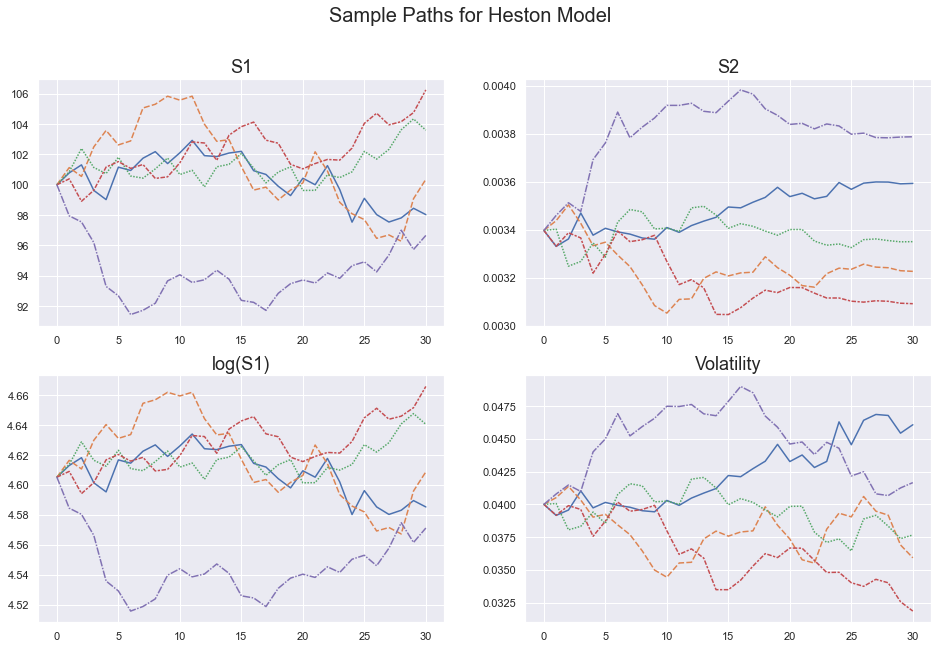

In [9]:
############# Plot Sample Path ################

sample_Heston, axes = plt.subplots(2,2,figsize=(16, 10))
sample_Heston.suptitle('Sample Paths for Heston Model',fontsize= 20)

idx = list(np.random.randint(N_sample, size=5))

sns.lineplot(data=df_spot.loc[idx,:].transpose(),legend=False, ax = axes[0,0])
axes[0,0].set_title("S1",fontsize= 18)
sns.lineplot(data=np.log(df_spot.loc[idx,:].transpose()),legend=False, ax = axes[1,0])
axes[1,0].set_title("log(S1)",fontsize= 18)
sns.lineplot(data=df_s2.loc[idx,:].transpose(),legend=False, ax = axes[0,1])
axes[0,1].set_title("S2",fontsize= 18)
sns.lineplot(data=df_vol.loc[idx,:].transpose(),legend=False, ax = axes[1,1])
axes[1,1].set_title("Volatility",fontsize= 18)

plt.show()

In [10]:
############## Prepare Data for NN ################

# df --> ndarray
info = np.ones((N_sample,T+1,d))
info[:,:,0] = np.log(df_spot.to_numpy())
info[:,:,1] = df_vol.to_numpy()
price = np.ones((N_sample,T+1,d))
price[:,:,0] = df_spot.to_numpy()
price[:,:,0] = df_s2.to_numpy()

# train/val/test split
for data in ['info','price']:
    df = globals()[data]
    globals()[data+'_train'] = df[:int(p_train*N_sample)]
    globals()[data+'_val'] = df[int(p_train*N_sample):int((p_val+p_train)*N_sample)]
    globals()[data+'_test'] = df[int((p_val+p_train)*N_sample):]

In [18]:
################ Build NN ####################

class SemiRecurrentNN:
    
    def __init__(self,input_shape,hidden_dim,CVar_alpha,is_simple=False,verbose=True):
        self.CVar_alpha = CVar_alpha
        self.build_model(input_shape,hidden_dim,is_simple,verbose)

        
    def build_model(self,input_shape,hidden_dim,is_simple=False,verbose=True):
        self.inputs = tf.keras.layers.Input(shape=input_shape,name='input')
        self.outputs = []
        for t in range(input_shape[0]-1): # build network for time t
            self.build_block(t,hidden_dim,is_simple)
        self.outputs = tf.keras.layers.Lambda(lambda x:tf.concat(x,axis=1),name='output')(self.outputs)
        self.model = tf.keras.models.Model(inputs=self.inputs, outputs=self.outputs)
        self.model.compile(loss=self.loss_CVar(), optimizer=tf.keras.optimizers.Adam(0.005))
        if verbose:
            self.model.summary()
        
        
    # network for time t_k
    def build_block(self,t,hidden_dim,is_simple=False):
        
        ############ input layer ############
        info = tf.keras.layers.Lambda(lambda x: x[:,t,:],name='info_'+str(t))(self.inputs)
                                                        # log(s1) and v at time t
        if t==0 or is_simple: # first trading date
            inputs = info
        else: # not the first trading date
            holdings = self.outputs[t-1] # holdings at time t-1
            inputs = tf.keras.layers.Lambda(lambda x:tf.concat(x,axis=1),name='info+delta_'+str(t))([holdings,info])
            
        ########## hidden layers ########
        hidden1 = self.dense_layer(inputs,hidden_dim[0],name='hidden1_'+str(t))
        hidden2 = self.dense_layer(hidden1,hidden_dim[1],name='hidden2_'+str(t))
        output = tf.keras.layers.Dense(input_shape[1],name='out_'+str(t)+'_dense')(hidden2)
        
        ########### output ###########
        self.outputs.append(output)
        
        
    # hidden layer structure
    def dense_layer(self,inputs,dim,name):
        hidden = tf.keras.layers.Dense(dim,name=name+'_dense')(inputs)
        hidden_bn = tf.keras.layers.BatchNormalization(name=name+'_bn')(hidden)
        hidden_activated = tf.keras.layers.Activation('relu',name=name+'_relu')(hidden_bn)
        return hidden_activated
    
    
    # loss function in keras loss function signiture
    def loss_CVar(self,cost=0):
        def loss(price,delta):
            ds1 = price[:,1:,0]-price[:,:-1,0]
            ds2 = price[:,1:,1]-price[:,:-1,1]
            delta1 = delta[:,:,0]
            delta2 = delta[:,:,1]
            PnL = tf.reduce_sum(tf.add(ds1*delta1,ds2*delta2), axis=1)
            # TODO: add cost loss
            CVar, _ = tf.nn.top_k(-PnL, tf.cast((1-self.CVar_alpha)*batch_size, tf.int32))
            return tf.reduce_mean(CVar)
        return loss
        
        
    def fit(self, info, price, batch_size, n_epochs, inputs_val, price_val):
        self.model.fit(info, price, batch_size=batch_size, epochs=n_epochs,
                                       validation_data=(inputs_val,price_val))

        

In [19]:
semi_recurrent_nn = SemiRecurrentNN(input_shape,hidden_dim,CVar_alpha,is_simple,verbose=True)

ValueError: 'info+delta_1' is not a valid scope name

In [ ]:
semi_recurrent_nn.fit(info_train, price_train, batch_size, n_epochs, info_val, price_val)

### Numerical Experiments 2:  

### Conclusion and discussions

### Reference (optional)